In [140]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Conversion to DataFrame

In [141]:
students_df = pd.read_xml('/Users/martiheit/data/students.xml')
students_df.head()

,name,email,grade,age
0,John,john@mail.com,A,16
1,Alice,alice@mail.com,B,17
2,Bob,bob@mail.com,C,16
3,Hannah,hannah@mail.com,A,17


In [142]:
# json
subjects_df = pd.read_json('/Users/martiheit/data/students.json')
subjects_df.head()

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [143]:
# html
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')[0]
table_MN.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%
2,2018,Governor,42.4%,53.9%,3.7%
3,2018,Senator,36.2%,60.3%,3.4%
4,2018,Senator,42.4%,53.0%,4.6%


In [144]:
diamonds_df = pd.read_csv('/Users/martiheit/data/diamonds.csv')
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploration

In [145]:
student_info = {
    'id': [1,2,3,4],
    'name': ['Marti', 'Joleena', 'Nestor', 'Faye'],
    'age': [21, 22, 23, 24],
    'previous_job': [np.nan, 'Engineer', 'Teacher', 'Engineer'],
    'birthday': ['05-12-2000', '05-12-1999', '03-22-1998', '01-01-1997'],
    'acct_balance': ['0', '120000', '40000', '140000']
}
df_student = pd.DataFrame.from_dict(data)
df_student.head()

,id,name,age,previous_job,birthday,acct_balance
0,1,Marti,21,NaN,05-12-2000,0
1,2,Joleena,22,Software Engineer,05-12-1999,120000
2,3,Nestor,23,Math teacher,03-22-1998,40000
3,4,Faye,24,Software Engineer,01-01-1997,140000


In [146]:
df_student.shape

(4, 6)

In [147]:
df_student.columns

Index(['id', 'name', 'age', 'previous_job', 'birthday', 'acct_balance'], dtype='object')

In [148]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4 non-null      int64 
 1   name          4 non-null      object
 2   age           4 non-null      int64 
 3   previous_job  3 non-null      object
 4   birthday      4 non-null      object
 5   acct_balance  4 non-null      object
dtypes: int64(2), object(4)
memory usage: 320.0+ bytes


In [149]:
df_student.isnull()

,id,name,age,previous_job,birthday,acct_balance
0,False,False,False,True,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False


In [150]:
df_student.describe()

,id,age
count,4.000000,4.000000
mean,2.500000,22.500000
std,1.290994,1.290994
min,1.000000,21.000000
25%,1.750000,21.750000
50%,2.500000,22.500000
75%,3.250000,23.250000
max,4.000000,24.000000


In [151]:
df_student['previous_job'].value_counts()

Software Engineer    2
Math teacher         1
Name: previous_job, dtype: int64

# Preprocessing

## Converting Data Types

In [152]:
df_student.dtypes

id               int64
name            object
age              int64
previous_job    object
birthday        object
acct_balance    object
dtype: object

In [153]:
df_student['birthday'] = pd.to_datetime(df_student['birthday'])
df_student['acct_balance'] = pd.to_numeric(df_student['acct_balance'])

In [154]:
df_student.dtypes

id                       int64
name                    object
age                      int64
previous_job            object
birthday        datetime64[ns]
acct_balance             int64
dtype: object

In [155]:
df_student['previous_job'] = df_student['previous_job'].fillna('Student')

In [156]:
df_student

,id,name,age,previous_job,birthday,acct_balance
0,1,Marti,21,Student,2000-05-12,0
1,2,Joleena,22,Software Engineer,1999-05-12,120000
2,3,Nestor,23,Math teacher,1998-03-22,40000
3,4,Faye,24,Software Engineer,1997-01-01,140000


## Appending Data

In [157]:
df_student['gender'] = ['F', 'F', 'M', 'F']
df_student

,id,name,age,previous_job,birthday,acct_balance,gender
0,1,Marti,21,Student,2000-05-12,0,F
1,2,Joleena,22,Software Engineer,1999-05-12,120000,F
2,3,Nestor,23,Math teacher,1998-03-22,40000,M
3,4,Faye,24,Software Engineer,1997-01-01,140000,F


## Removing/Reindex Data

In [158]:
df_student = df_student.drop('id', axis = 1)
df_age_index = df_student.set_index('age')

In [159]:
df_age_index.head()

,name,previous_job,birthday,acct_balance,gender
age,,,,,
21,Marti,Student,2000-05-12,0,F
22,Joleena,Software Engineer,1999-05-12,120000,F
23,Nestor,Math teacher,1998-03-22,40000,M
24,Faye,Software Engineer,1997-01-01,140000,F


# Visualize

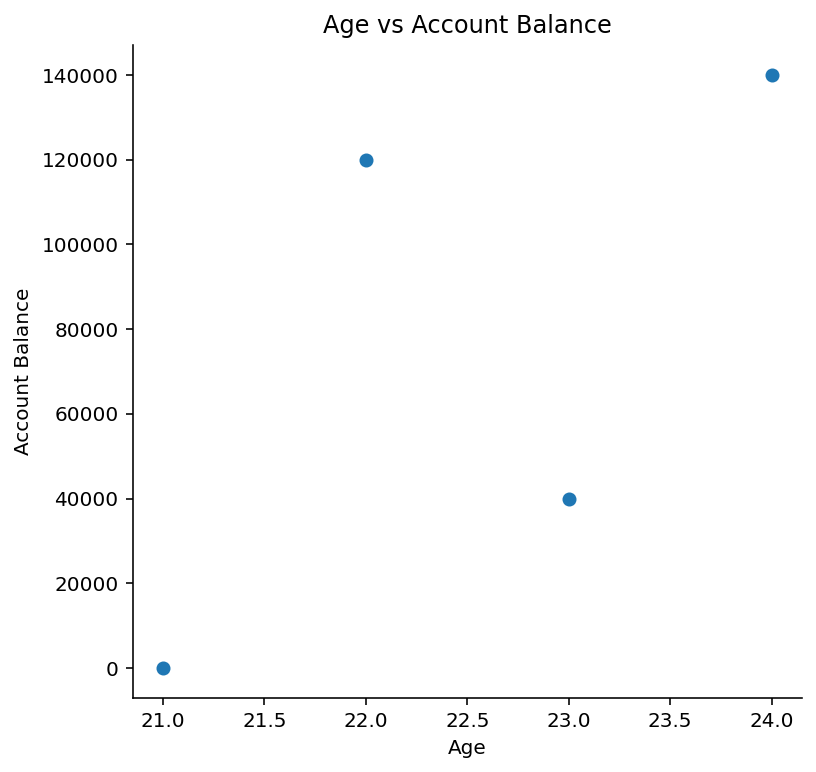

In [160]:
fig,ax = plt.subplots(figsize = (6,6))
ax.scatter(df_student['age'], df_student['acct_balance'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Age')
ax.set_ylabel('Account Balance')
plt.title('Age vs Account Balance')
plt.show()

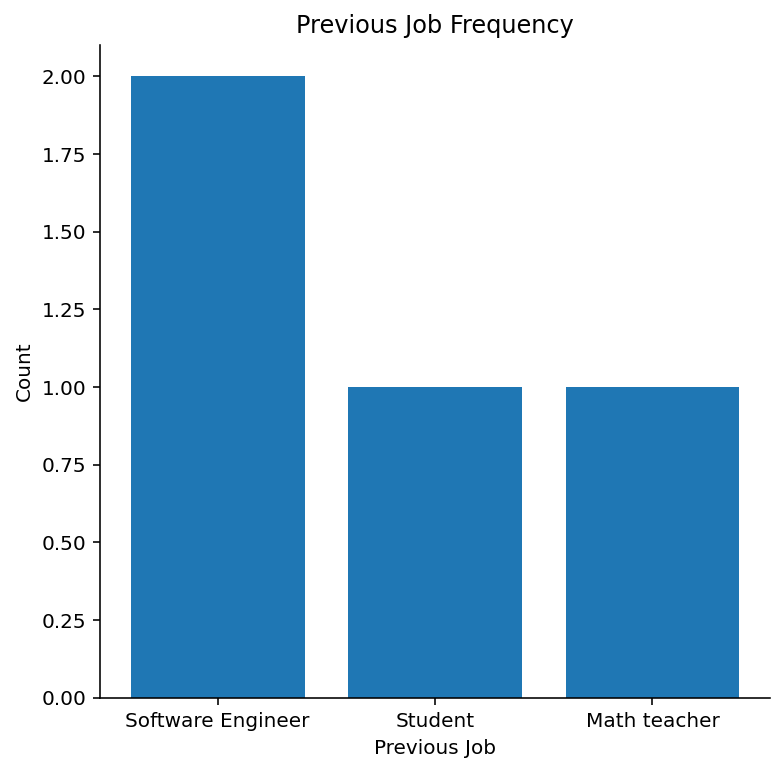

In [161]:
fig,ax = plt.subplots(figsize = (6,6))
ax.bar(df_student['previous_job'].value_counts().index, df_student['previous_job'].value_counts().values)
plt.title('Previous Job Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Previous Job')
ax.set_ylabel('Count')
plt.show()